# Pilar de Modelagem

Agora, o objetivo é identificar um subespaço do embedding que seja capaz de capturar melhor a similaridade dos atributos de modelagem. Para isso, vamos comparar apenas produtos do mesmo grupo e criar um subespaço para cada característica, com uma estratégia equivalente ao que foi feito com o LDA no pilar de cor. 

Agora, para cada atributo de modelagem, vamos reduzir o embedding com LDA usando tal atributo como rótulo, fazendo com que cada subespaço capture a similaridade dos produtos em relação a tal atributo.

Vamos começar observando como os diferentes grupos estão distribuídos no espaço de embedding completo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Funções

In [15]:
import matplotlib.pyplot as plt

# Função para plotar os componentes reduzidos com cores definidas por um dicionário
def plot_cores(df, cor_column='COR_PRIMARIA', reducer='LDA', color_dict=None, show=True):
    """
    Plota os componentes reduzidos colorindo os pontos com base em um dicionário de cores.
    """

    # Setando componente x e y conforme o reducer
    component_x, component_y = f'EMB_{reducer}_0', f'EMB_{reducer}_1'

    # Filtrando apenas as linhas que possuem valores válidos (sem NaN) nos componentes
    df_plot = df.dropna(subset=[component_x, component_y, cor_column])

    # Se o dicionário de cores não for fornecido, gerar um dicionário de cores padrão
    if color_dict is None:
        unique_colors = df_plot[cor_column].unique()
        color_dict = {color: plt.cm.tab20(i / len(unique_colors)) for i, color in enumerate(unique_colors)}

    # Removendo linhas com cores não mapeadas no dicionário de cores
    df_plot = df_plot[df_plot[cor_column].isin(color_dict.keys())]

    # Iterar por cada cor e plotar os pontos
    for cor, color_value in color_dict.items():
        subset = df_plot[df_plot[cor_column] == cor]
        
        # Adicionar borda preta se a cor for branca
        edge_color = 'black' if color_value == '#FFFFFF' else color_value

        plt.scatter(
            subset[component_x],
            subset[component_y],
            color=color_value,
            edgecolor=edge_color,  # Define a cor da borda
            linewidth=0.5 if color_value == '#FFFFFF' else 0,  # Define a largura da borda para pontos brancos
            alpha=0.7,
            label=cor
        )

    # Botando a legenda deslocada para fora do gráfico
    plt.legend(title=f"{cor_column}", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(component_x)
    plt.ylabel(component_y)
    plt.title(f"Componentes {reducer} com cores de {cor_column}")
    if show:
        plt.show()


In [16]:
# Função que aplica t-SNE para reduzir para duas dimensões
from sklearn.manifold import TSNE
from umap.umap_ import UMAP

def apply_tsne(df, colunas, n_components=2, tsne=None):

    if tsne is None:
        # Removendo linhas com valores nulos para treinar o modelo

        # Inicializando o modelo t-SNE
        tsne = TSNE(n_components=n_components, random_state=42)

        # Treinando o modelo e transformando os dados
        componentes = tsne.fit_transform(df[colunas])

        # Criando um novo DataFrame com as colunas desejadas
        df_tsne = df[['id_produto']].copy() 
    else:
        # Transformando os dados
        componentes = tsne.transform(df[colunas])

        # Criando um novo DataFrame com as colunas desejadas
        df_tsne = df[['id_produto']].copy()

    for i in range(n_components):
        df_tsne[f'EMB_TSNE_{i}'] = componentes[:, i]

    return df_tsne, tsne

def apply_umap(df, colunas, n_components=2, umap=None):

    if umap is None:
        # Removendo linhas com valores nulos para treinar o modelo

        # Inicializando o modelo t-SNE
        umap = UMAP(n_components=n_components, random_state=42)

        # Treinando o modelo e transformando os dados
        componentes = umap.fit_transform(df[colunas])

        # Criando um novo DataFrame com as colunas desejadas
        df_umap = df[['id_produto']].copy() 
    else:
        # Transformando os dados
        componentes = umap.transform(df[colunas])

        # Criando um novo DataFrame com as colunas desejadas
        df_umap = df[['id_produto']].copy()

    for i in range(n_components):
        df_umap[f'EMB_UMAP_{i}'] = componentes[:, i]

    return df_umap, umap

In [36]:
from PIL import Image

def plot_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [17]:
# Puxando arquivo com embeddings de cada produto id
df_img_embs = pd.read_parquet('datasets/img_embeddings.parquet')

In [18]:
df_img_embs.sample(3)

,id_produto,emb_img_0,emb_img_1,emb_img_2,emb_img_3,emb_img_4,emb_img_5,emb_img_6,emb_img_7,emb_img_8,...,emb_img_502,emb_img_503,emb_img_504,emb_img_505,emb_img_506,emb_img_507,emb_img_508,emb_img_509,emb_img_510,emb_img_511
695,07-20-6572-09257,-0.111940,-0.025859,-0.021057,0.219967,-0.202675,0.147201,-0.367152,-0.841655,0.463574,...,0.019903,-0.145409,-0.023084,0.152533,-0.050265,0.185931,-0.062697,0.906885,0.026944,0.272253
94,25-34-1739-6262,-0.067625,-0.207490,-0.334239,0.488590,-0.433983,0.209431,-0.669335,-0.825970,0.097691,...,0.202976,-0.147264,0.046500,0.155075,-0.428934,-0.015248,0.150850,1.008657,-0.268795,0.618681
262,52-06-0688-09258,-0.134658,-0.026733,-0.021913,0.177632,-0.340146,0.248197,-0.612794,-0.720418,0.305116,...,0.073249,-0.268415,0.528718,0.015359,-0.462423,-0.120117,0.012623,0.967230,-0.264765,0.474943


In [19]:
# Reduzindo com umap
df_img_embs_umap, umap = apply_umap(df_img_embs, colunas=df_img_embs.columns[1:], n_components=2)

c:\Users\Cole\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
# Puxando arquivo com categorização de cada produto id
df_categories = pd.read_parquet('datasets/base.parquet')

In [21]:
# Puxando coluna grupo_produto de df_categories
df_img_embs_umap = pd.merge(df_img_embs_umap, df_categories[['id_produto', 'grupo_produto']], on='id_produto')

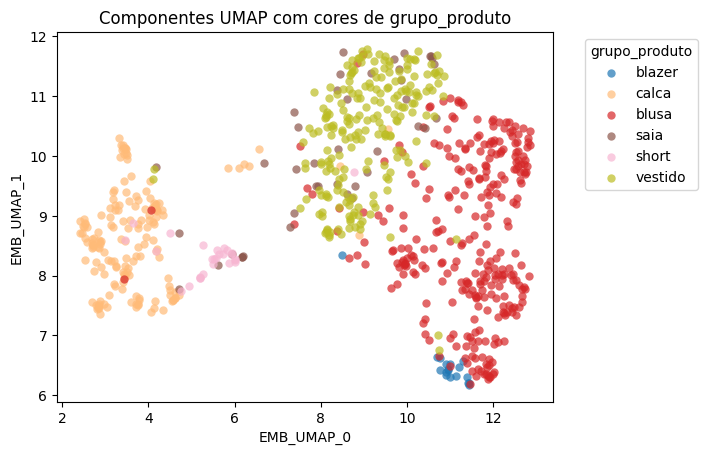

In [22]:
plot_cores(df_img_embs_umap, cor_column='grupo_produto', reducer='UMAP', show=True)

In [23]:
df_categories.sample(3)

,file_path,id_produto,grupo_produto,file_name,link,PRODUTOS,CARACTERISTICAS,LOCALIZACAO_ESTAMPA,COR_PREDOMINANTE,DECOTE_OU_GOLA,...,ESTILO,TIPO_MANGA,TIPO_CINTURA,COMPRIMENTO,MODELAGEM,ESTAMPA,FENDA_PERNA,MODELAGEM_SAIA,TIPO_BARRA,desc_produto
437,animale_images_cropped/blusa/top-blusa_t-shirt...,52-06-0673-1405,blusa,top-blusa_t-shirt-de-tricot-rose-com-gola-v-me...,https://animaleproductsimages.s3.us-east-1.ama...,52-06-0673-1405,{COMPRIMENTO: CURTA;MODELAGEM: SOLTA;COMPRIMEN...,N/A,BEGE,V,...,CASUAL,REGULAR,None,CURTA,SOLTA,SEM_ESTAMPA,None,None,None,t shirt de tricot rose com gola v metalizada
506,animale_images_cropped/saia/saia_saia-de-trico...,25-11-1239-0200,saia,saia_saia-de-tricoline-com-recortes-listrada_a...,https://animaleproductsimages.s3.us-east-1.ama...,25-11-1239-0200,{COMPRIMENTO: MEIO_COXA; MODELAGEM: GODÊ; TIPO...,ROUPA_INTEIRA,AZUL,None,...,CASUAL,None,ALTA,MEIO_COXA,GODÊ,LISTRADO_VERTICAL,N/A,None,EVASÊ,saia de tricoline com recortes listrada
256,animale_images_cropped/blusa/top-blusa_blusa-d...,52-13-5394-09253,blusa,top-blusa_blusa-de-georgette-verde-com-tunel-n...,https://animaleproductsimages.s3.us-east-1.ama...,52-13-5394-09253,{COMPRIMENTO: CURTA; MODELAGEM: SOLTA; COMPRIM...,N/A,VERDE,REDONDA,...,BASICO,N/A,None,CURTA,SOLTA,SEM_ESTAMPA,None,None,None,blusa de georgette verde com tunel no decote


In [24]:
df_categories['grupo_produto'].value_counts()

blusa      299
vestido    216
calca      165
saia        41
short       27
blazer      18
Name: grupo_produto, dtype: int64

In [25]:
df_vestido = df_categories.loc[df_categories['grupo_produto'] == 'vestido']
df_blusa = df_categories.loc[df_categories['grupo_produto'] == 'blusa']
df_calca = df_categories.loc[df_categories['grupo_produto'] == 'calca']
df_saia = df_categories.loc[df_categories['grupo_produto'] == 'saia']
df_short = df_categories.loc[df_categories['grupo_produto'] == 'short']
df_blazer = df_categories.loc[df_categories['grupo_produto'] == 'blazer']

In [26]:
# Exibindo colunas que tem pelo menos um valor não nulo
df_vestido.count()

file_path              216
id_produto             216
grupo_produto          216
file_name              216
link                   216
PRODUTOS               216
CARACTERISTICAS        216
LOCALIZACAO_ESTAMPA    216
COR_PREDOMINANTE       216
DECOTE_OU_GOLA         216
COMPRIMENTO_SAIA       216
AMARRACAO              216
ZOOM_ESTAMPA           216
COMPRIMENTO_MANGA      216
ESTILO                 216
TIPO_MANGA             216
TIPO_CINTURA             0
COMPRIMENTO              0
MODELAGEM                0
ESTAMPA                216
FENDA_PERNA            216
MODELAGEM_SAIA         216
TIPO_BARRA               0
desc_produto           216
dtype: int64

In [27]:
atributos_mod_vestido = ['COMPRIMENTO_SAIA', 'COMPRIMENTO_MANGA', 'TIPO_MANGA', 'DECOTE_OU_GOLA', 'FENDA_PERNA', 'AMARRACAO']

In [28]:
for atributo in atributos_mod_vestido:
    print(df_vestido[atributo].value_counts())

CALCANHAR         80
MEIO_COXA         74
MINI              43
JOELHO             7
MEIO_CALCANHAR     6
MEIO_CANELA        4
N/A                1
MEIO_MENGANNA      1
Name: COMPRIMENTO_SAIA, dtype: int64
SEM_MANGA       141
COMPRIDA         28
CURTA            15
LONGA            15
ALÇA             13
N/A               2
TRES_QUARTOS      1
TRÊS_QUARTOS      1
Name: COMPRIMENTO_MANGA, dtype: int64
N/A              150
REGULAR           30
OMBRO_UNICO       12
BUFANTE           11
FLARE              6
OMBRO_A_OMBRO      4
KIMONO             2
AMPLA              1
Name: TIPO_MANGA, dtype: int64
V                  78
TOMARA_QUE_CAIA    32
REDONDA            29
RETO               19
HALTER             16
OMBRO_A_OMBRO      11
CORACAO             9
QUADRADA            8
U                   5
N/A                 4
OMBRO_UNICO         2
POLO                1
ALTA                1
GOLA_ALTA           1
Name: DECOTE_OU_GOLA, dtype: int64
N/A    154
SIM     62
Name: FENDA_PERNA, dtype: int64
N

Hipotéses:
- todos os curtos foram classificados em mini
- todos os meio_coxa são meio_canela


In [57]:
# Pegando exemplos de df_vestidos que são comprimento meio_coxa
files_paths = df_vestido.loc[df_vestido['COMPRIMENTO_SAIA'] == 'MEIO_COXA']['file_path'].values

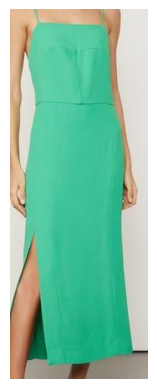

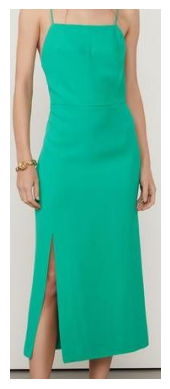

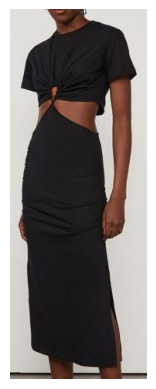

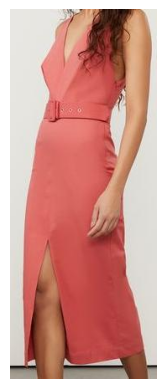

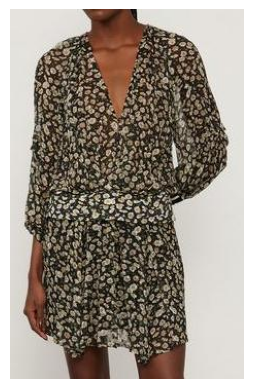

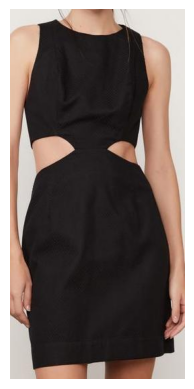

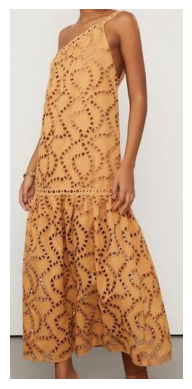

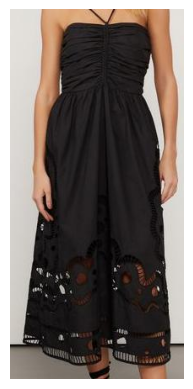

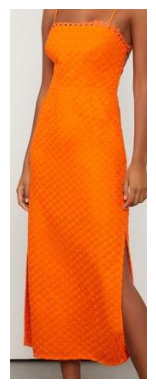

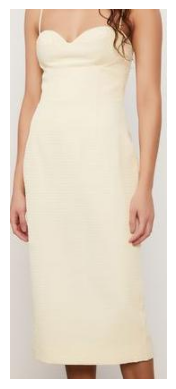

In [58]:
# Plotando alguns exemplos de files_paths
for i in range(10):
    plot_image(files_paths[i])
    # input_code= input("1-Meio coxa, 2-Longo, 3-Curto: ")

In [61]:
# Pegando exemplos de df_vestidos que são comprimento meio_coxa
files_paths = df_vestido.loc[df_vestido['DECOTE_OU_GOLA'] == 'OMBRO_A_OMBRO']['file_path'].values

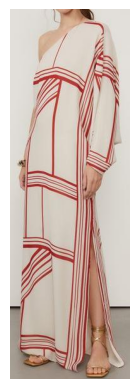

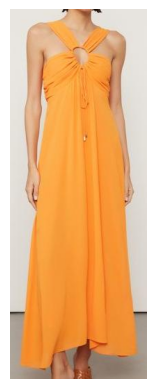

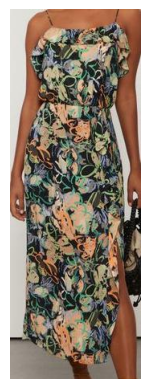

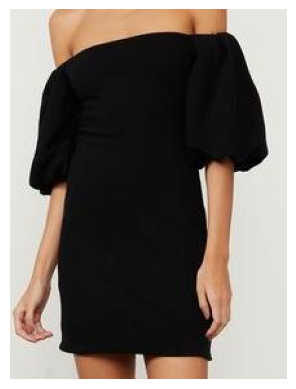

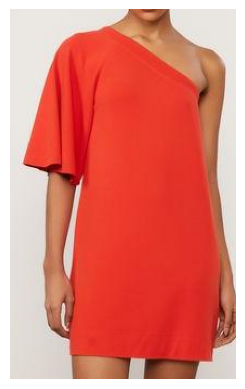

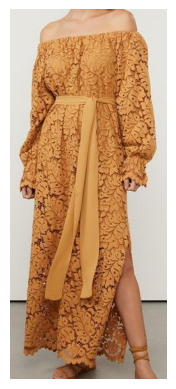

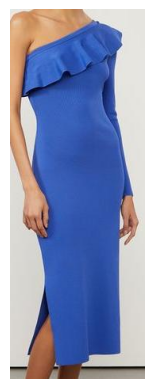

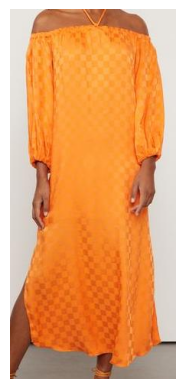

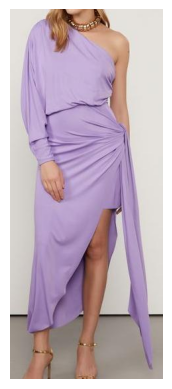

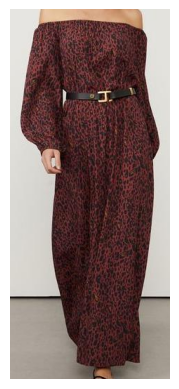

In [62]:
for i in range(10):
    plot_image(files_paths[i])
    # input_code= input("1-Ombro só, 2-Decote V, 3-Decote redondo: ")

#### Checkpoint: o tagueamento dos atributos de modelagem com o gpt-4o-mini tem muitos erros e precisará ser refeito.

Pontos a considerar:
- as categorias de modelagem precisam ser mais simples e objetivas, pois se o gpt está confundindo o CLIP não vai conseguir compreender.
- o gpt classifica melhor as imagens inteiras do que segmentadas.

Próximos passos:

- revisar os atributos pra cada grupo
- resize das imagens originais (sem segmentar)
- rodar no gpt de novo (outro modelo) com as imagens resizadas
- reavaliar os atributos
- seguir com a modelagem